In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train (3).csv')
test_df=pd.read_csv('test (2).csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

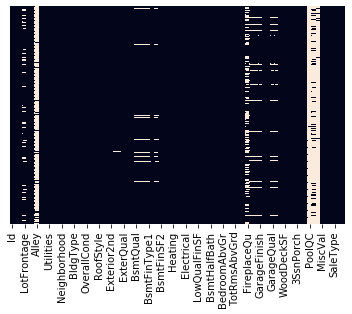

In [9]:
df['MSZoning'].value_counts()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [12]:
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
df.drop(['Alley'],axis=1,inplace=True)
test_df.drop(['Alley'],axis=1,inplace=True)

In [13]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)
test_df.drop(['PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [15]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [17]:
df.shape
test_df.shape

(1459, 75)

In [20]:
df.drop(['Id'],axis=1,inplace=True)
test_df.drop(['Id'],axis=1,inplace=True)
df.isnull().sum()
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [21]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

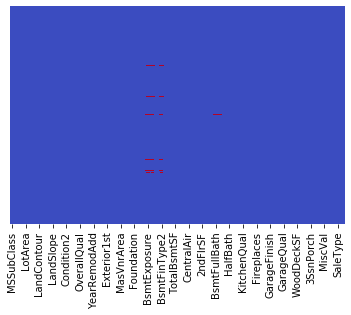

In [24]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm'')
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [25]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

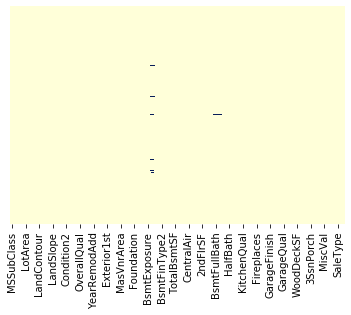

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [30]:
#df.dropna(inplace=True)
df.shape
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [31]:
test_df.shape
##HAndle Categorical Features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [32]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [33]:
main_df=df.copy()
final_df=pd.concat([df,test_df],axis=0)
final_df.shape
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [34]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2881, 175)

In [36]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]
df_Train.head()
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [37]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
#!pip install keras
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [53]:
#Artificial Neural Networks Implementation
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
regressor=Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
regressor.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

#Adding the third hidden layer
regressor.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
regressor.add(Dense(output_dim = 1, init = 'he_uniform'))

regressor.compile(loss=root_mean_squared_error, optimizer='Adamax')
regressor.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=174, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\Shailesh Nanisetty\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `

Train on 1137 samples, validate on 285 samples
Epoch 1/1000
1137/1137 [==============================] - 1s 549us/step - loss: 136049.2999 - val_loss: 50067.2374
Epoch 2/1000
1137/1137 [==============================] - 0s 302us/step - loss: 49520.4009 - val_loss: 46819.5507
Epoch 3/1000
1137/1137 [==============================] - 0s 286us/step - loss: 45830.9929 - val_loss: 43770.9659
Epoch 4/1000
1137/1137 [==============================] - 0s 278us/step - loss: 43070.5880 - val_loss: 41420.4890
Epoch 5/1000
1137/1137 [==============================] - 0s 283us/step - loss: 39574.9188 - val_loss: 39598.2712
Epoch 6/1000
1137/1137 [==============================] - 0s 268us/step - loss: 36741.0049 - val_loss: 37186.5482
Epoch 7/1000
1137/1137 [==============================] - 0s 280us/step - loss: 34075.1955 - val_loss: 35144.5390
Epoch 8/1000
1137/1137 [==============================] - 0s 304us/step - loss: 32031.8393 - val_loss: 33961.3875
Epoch 9/1000
1137/1137 [================

Epoch 72/1000
1137/1137 [==============================] - 0s 329us/step - loss: 23948.5961 - val_loss: 28434.6874
Epoch 73/1000
1137/1137 [==============================] - 0s 286us/step - loss: 24198.8012 - val_loss: 28922.8418
Epoch 74/1000
1137/1137 [==============================] - 0s 298us/step - loss: 24000.1250 - val_loss: 28283.7279
Epoch 75/1000
1137/1137 [==============================] - 0s 307us/step - loss: 24102.2133 - val_loss: 30070.2765
Epoch 76/1000
1137/1137 [==============================] - 0s 292us/step - loss: 23859.0032 - val_loss: 28296.0587
Epoch 77/1000
1137/1137 [==============================] - 0s 291us/step - loss: 23850.3599 - val_loss: 30082.4726
Epoch 78/1000
1137/1137 [==============================] - 0s 295us/step - loss: 23773.8317 - val_loss: 28248.8759
Epoch 79/1000
1137/1137 [==============================] - 0s 274us/step - loss: 24054.0848 - val_loss: 28904.3221
Epoch 80/1000
1137/1137 [==============================] - 0s 254us/step - loss:

1137/1137 [==============================] - 0s 278us/step - loss: 22396.2361 - val_loss: 27009.5166
Epoch 143/1000
1137/1137 [==============================] - 0s 293us/step - loss: 22222.2517 - val_loss: 27332.6513
Epoch 144/1000
1137/1137 [==============================] - 0s 285us/step - loss: 22282.7489 - val_loss: 27191.5817
Epoch 145/1000
1137/1137 [==============================] - 0s 276us/step - loss: 22402.5280 - val_loss: 27458.6266
Epoch 146/1000
1137/1137 [==============================] - 0s 292us/step - loss: 22575.7659 - val_loss: 27075.3271
Epoch 147/1000
1137/1137 [==============================] - 0s 290us/step - loss: 22198.3718 - val_loss: 27700.0835
Epoch 148/1000
1137/1137 [==============================] - 0s 301us/step - loss: 22115.8703 - val_loss: 27084.8882
Epoch 149/1000
1137/1137 [==============================] - 0s 302us/step - loss: 22006.7029 - val_loss: 27133.5526
Epoch 150/1000
1137/1137 [==============================] - 0s 292us/step - loss: 22392

Epoch 213/1000
1137/1137 [==============================] - 0s 305us/step - loss: 20832.9412 - val_loss: 26450.6436
Epoch 214/1000
1137/1137 [==============================] - 0s 294us/step - loss: 20875.7785 - val_loss: 25887.4409
Epoch 215/1000
1137/1137 [==============================] - 0s 276us/step - loss: 21156.6731 - val_loss: 27453.7689
Epoch 216/1000
1137/1137 [==============================] - 0s 260us/step - loss: 20802.4481 - val_loss: 26875.7976
Epoch 217/1000
1137/1137 [==============================] - 0s 270us/step - loss: 20747.8448 - val_loss: 26140.7332
Epoch 218/1000
1137/1137 [==============================] - 0s 272us/step - loss: 20455.2238 - val_loss: 26081.5551
Epoch 219/1000
1137/1137 [==============================] - 0s 257us/step - loss: 21110.9583 - val_loss: 27920.2730
Epoch 220/1000
1137/1137 [==============================] - 0s 272us/step - loss: 20293.5117 - val_loss: 25987.5138
Epoch 221/1000
1137/1137 [==============================] - 0s 277us/ste

1137/1137 [==============================] - 0s 264us/step - loss: 18961.5449 - val_loss: 24900.8538
Epoch 284/1000
1137/1137 [==============================] - 0s 284us/step - loss: 18950.4144 - val_loss: 24415.1975
Epoch 285/1000
1137/1137 [==============================] - 0s 271us/step - loss: 18617.9745 - val_loss: 24736.2241
Epoch 286/1000
1137/1137 [==============================] - 0s 278us/step - loss: 18928.2506 - val_loss: 24106.7644
Epoch 287/1000
1137/1137 [==============================] - 0s 291us/step - loss: 19286.0049 - val_loss: 24634.5536
Epoch 288/1000
1137/1137 [==============================] - 0s 244us/step - loss: 18964.4361 - val_loss: 24621.4136
Epoch 289/1000
1137/1137 [==============================] - 0s 264us/step - loss: 18813.6496 - val_loss: 24731.5807
Epoch 290/1000
1137/1137 [==============================] - 0s 265us/step - loss: 18962.1864 - val_loss: 25281.0034
Epoch 291/1000
1137/1137 [==============================] - 0s 283us/step - loss: 18579

Epoch 354/1000
1137/1137 [==============================] - 0s 298us/step - loss: 17865.4538 - val_loss: 22828.7614
Epoch 355/1000
1137/1137 [==============================] - 0s 259us/step - loss: 17866.2541 - val_loss: 23127.4882
Epoch 356/1000
1137/1137 [==============================] - 0s 252us/step - loss: 17554.5915 - val_loss: 23705.2172
Epoch 357/1000
1137/1137 [==============================] - 0s 290us/step - loss: 17523.3937 - val_loss: 22404.3800
Epoch 358/1000
1137/1137 [==============================] - 0s 278us/step - loss: 18004.2261 - val_loss: 22707.5479
Epoch 359/1000
1137/1137 [==============================] - 0s 252us/step - loss: 17432.3548 - val_loss: 22503.6257
Epoch 360/1000
1137/1137 [==============================] - 0s 256us/step - loss: 17656.4482 - val_loss: 23612.3986
Epoch 361/1000
1137/1137 [==============================] - 0s 284us/step - loss: 17328.5418 - val_loss: 22449.6717
Epoch 362/1000
1137/1137 [==============================] - 0s 276us/ste

1137/1137 [==============================] - 0s 272us/step - loss: 16403.2948 - val_loss: 22074.6623
Epoch 425/1000
1137/1137 [==============================] - 0s 283us/step - loss: 16748.4792 - val_loss: 21408.3706
Epoch 426/1000
1137/1137 [==============================] - 0s 252us/step - loss: 16584.5408 - val_loss: 21525.6255
Epoch 427/1000
1137/1137 [==============================] - 0s 284us/step - loss: 16607.8648 - val_loss: 21721.9572
Epoch 428/1000
1137/1137 [==============================] - 0s 324us/step - loss: 17365.3688 - val_loss: 22740.3293
Epoch 429/1000
1137/1137 [==============================] - 0s 279us/step - loss: 16356.4108 - val_loss: 21634.5524
Epoch 430/1000
1137/1137 [==============================] - 0s 289us/step - loss: 16505.1588 - val_loss: 21261.5493
Epoch 431/1000
1137/1137 [==============================] - 0s 336us/step - loss: 16492.8458 - val_loss: 21386.8924
Epoch 432/1000
1137/1137 [==============================] - 0s 273us/step - loss: 16957

Epoch 495/1000
1137/1137 [==============================] - 0s 247us/step - loss: 15356.3218 - val_loss: 20647.7625
Epoch 496/1000
1137/1137 [==============================] - 0s 251us/step - loss: 15952.1505 - val_loss: 21134.7640
Epoch 497/1000
1137/1137 [==============================] - 0s 258us/step - loss: 15907.9039 - val_loss: 20497.3782
Epoch 498/1000
1137/1137 [==============================] - 0s 277us/step - loss: 15551.1339 - val_loss: 21082.6856
Epoch 499/1000
1137/1137 [==============================] - 0s 249us/step - loss: 16209.8834 - val_loss: 23951.5074
Epoch 500/1000
1137/1137 [==============================] - 0s 251us/step - loss: 16363.6343 - val_loss: 20681.3344
Epoch 501/1000
1137/1137 [==============================] - 0s 267us/step - loss: 16186.6857 - val_loss: 20483.0563
Epoch 502/1000
1137/1137 [==============================] - 0s 276us/step - loss: 15646.7321 - val_loss: 20827.6726
Epoch 503/1000
1137/1137 [==============================] - 0s 254us/ste

1137/1137 [==============================] - 0s 251us/step - loss: 15177.5822 - val_loss: 21629.3004
Epoch 566/1000
1137/1137 [==============================] - 0s 258us/step - loss: 15289.5971 - val_loss: 21372.1851
Epoch 567/1000
1137/1137 [==============================] - 0s 306us/step - loss: 15532.6094 - val_loss: 20319.6021
Epoch 568/1000
1137/1137 [==============================] - 0s 265us/step - loss: 15094.4210 - val_loss: 20109.6677
Epoch 569/1000
1137/1137 [==============================] - 0s 271us/step - loss: 15734.3200 - val_loss: 20815.1727
Epoch 570/1000
1137/1137 [==============================] - 0s 292us/step - loss: 15622.8191 - val_loss: 20223.6029
Epoch 571/1000
1137/1137 [==============================] - 0s 268us/step - loss: 15099.7307 - val_loss: 20121.5911
Epoch 572/1000
1137/1137 [==============================] - 0s 252us/step - loss: 15267.5021 - val_loss: 20553.6395
Epoch 573/1000
1137/1137 [==============================] - 0s 279us/step - loss: 15151

Epoch 636/1000
1137/1137 [==============================] - 0s 260us/step - loss: 14916.9551 - val_loss: 20194.5712
Epoch 637/1000
1137/1137 [==============================] - 0s 259us/step - loss: 14630.7778 - val_loss: 21102.7280
Epoch 638/1000
1137/1137 [==============================] - 0s 285us/step - loss: 15058.4499 - val_loss: 19611.2412
Epoch 639/1000
1137/1137 [==============================] - 0s 252us/step - loss: 14491.1517 - val_loss: 20211.1166
Epoch 640/1000
1137/1137 [==============================] - 0s 277us/step - loss: 14535.1444 - val_loss: 20521.6013
Epoch 641/1000
1137/1137 [==============================] - 0s 248us/step - loss: 14364.3196 - val_loss: 20982.6905
Epoch 642/1000
1137/1137 [==============================] - 0s 282us/step - loss: 14377.1600 - val_loss: 20822.3630
Epoch 643/1000
1137/1137 [==============================] - 0s 259us/step - loss: 15082.9673 - val_loss: 20995.6679
Epoch 644/1000
1137/1137 [==============================] - 0s 260us/ste

1137/1137 [==============================] - 0s 252us/step - loss: 14777.8001 - val_loss: 19498.5559
Epoch 707/1000
1137/1137 [==============================] - 0s 279us/step - loss: 14014.5300 - val_loss: 20715.5409
Epoch 708/1000
1137/1137 [==============================] - 0s 257us/step - loss: 14624.3874 - val_loss: 21327.1518
Epoch 709/1000
1137/1137 [==============================] - 0s 310us/step - loss: 14339.0644 - val_loss: 19291.5403
Epoch 710/1000
1137/1137 [==============================] - 0s 299us/step - loss: 14678.1012 - val_loss: 20216.1962
Epoch 711/1000
1137/1137 [==============================] - 0s 298us/step - loss: 14311.9123 - val_loss: 22304.7193
Epoch 712/1000
1137/1137 [==============================] - 0s 319us/step - loss: 14026.2332 - val_loss: 19596.5836
Epoch 713/1000
1137/1137 [==============================] - 0s 307us/step - loss: 13777.6777 - val_loss: 19988.4212
Epoch 714/1000
1137/1137 [==============================] - 0s 306us/step - loss: 13939

1137/1137 [==============================] - 0s 279us/step - loss: nan - val_loss: nan
Epoch 780/1000
1137/1137 [==============================] - 0s 251us/step - loss: nan - val_loss: nan
Epoch 781/1000
1137/1137 [==============================] - 0s 285us/step - loss: nan - val_loss: nan
Epoch 782/1000
1137/1137 [==============================] - 0s 258us/step - loss: nan - val_loss: nan
Epoch 783/1000
1137/1137 [==============================] - 0s 270us/step - loss: nan - val_loss: nan
Epoch 784/1000
1137/1137 [==============================] - 0s 272us/step - loss: nan - val_loss: nan
Epoch 785/1000
1137/1137 [==============================] - 0s 254us/step - loss: nan - val_loss: nan
Epoch 786/1000
1137/1137 [==============================] - 0s 272us/step - loss: nan - val_loss: nan
Epoch 787/1000
1137/1137 [==============================] - 0s 271us/step - loss: nan - val_loss: nan
Epoch 788/1000
1137/1137 [==============================] - 0s 289us/step - loss: nan - val_loss:

1137/1137 [==============================] - 0s 265us/step - loss: nan - val_loss: nan
Epoch 860/1000
1137/1137 [==============================] - 0s 284us/step - loss: nan - val_loss: nan
Epoch 861/1000
1137/1137 [==============================] - 0s 252us/step - loss: nan - val_loss: nan
Epoch 862/1000
1137/1137 [==============================] - 0s 272us/step - loss: nan - val_loss: nan
Epoch 863/1000
1137/1137 [==============================] - 0s 257us/step - loss: nan - val_loss: nan
Epoch 864/1000
1137/1137 [==============================] - 0s 284us/step - loss: nan - val_loss: nan
Epoch 865/1000
1137/1137 [==============================] - 0s 314us/step - loss: nan - val_loss: nan
Epoch 866/1000
1137/1137 [==============================] - 0s 278us/step - loss: nan - val_loss: nan
Epoch 867/1000
1137/1137 [==============================] - 0s 259us/step - loss: nan - val_loss: nan
Epoch 868/1000
1137/1137 [==============================] - 0s 251us/step - loss: nan - val_loss:

1137/1137 [==============================] - 0s 288us/step - loss: nan - val_loss: nan
Epoch 940/1000
1137/1137 [==============================] - 0s 253us/step - loss: nan - val_loss: nan
Epoch 941/1000
1137/1137 [==============================] - 0s 280us/step - loss: nan - val_loss: nan
Epoch 942/1000
1137/1137 [==============================] - 0s 253us/step - loss: nan - val_loss: nan
Epoch 943/1000
1137/1137 [==============================] - 0s 292us/step - loss: nan - val_loss: nan
Epoch 944/1000
1137/1137 [==============================] - 0s 249us/step - loss: nan - val_loss: nan
Epoch 945/1000
1137/1137 [==============================] - 0s 266us/step - loss: nan - val_loss: nan
Epoch 946/1000
1137/1137 [==============================] - 0s 303us/step - loss: nan - val_loss: nan
Epoch 947/1000
1137/1137 [==============================] - 0s 259us/step - loss: nan - val_loss: nan
Epoch 948/1000
1137/1137 [==============================] - 0s 258us/step - loss: nan - val_loss:

In [58]:
#df_Test
ann_pred=regressor.predict(df_Test)

In [59]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
#sub_df=pd.read_csv('sample_submission (1).csv')
#datasets=pd.concat([sub_df['Id'],pred],axis=1)
#datasets.columns=['Id','SalePrice']
#datasets.to_csv('MyAnswer.csv',index=False)
pred

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN
